# Adventure Works Analysis

### Step I: Import libraries and read in data set

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv('adventure_works_purchase_orders.csv')

### Step II: Examine and clean data set

In [3]:
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 25 columns):
SalesOrderNumber        41884 non-null object
OrderDate               41884 non-null object
DueDate                 41884 non-null object
ShipDate                41884 non-null object
Sales_Person            41884 non-null object
Sales_Region            41884 non-null object
Sales_Province          41884 non-null object
Sales_City              41884 non-null object
Sales_Postal_Code       41884 non-null int64
Customer_Code           41884 non-null object
Customer_Name           41884 non-null object
Customer_Region         41884 non-null object
Customer_Province       41884 non-null object
Customer_City           41884 non-null object
Customer_Postal_Code    41884 non-null object
LineItem_Id             41884 non-null int64
Product_Category        41884 non-null object
Product_Sub_Category    41884 non-null object
Product_Name            41884 non-null object
Product_Code       

Convert order date to datetime format and extract month

In [5]:
df['OrderDate'] = df['OrderDate'].apply(pd.to_datetime)
df['OrderMonth'] = df['OrderDate'].apply(lambda x: str(x)[:7])

Calculate profit for each order

In [6]:
df['Profit'] = (df['UnitPrice'] - df['Unit_Cost'] - (df['UnitPriceDiscount'] * df['UnitPrice'])
                - df['Unit_Freight_Cost']) * df['OrderQty']

### Step III: High level analysis of monthly profits, volumes, pricing, and costs

Examine total monthly **profits** over time

In [7]:
monthly_profits = df.groupby('OrderMonth')['Profit'].sum().reset_index()

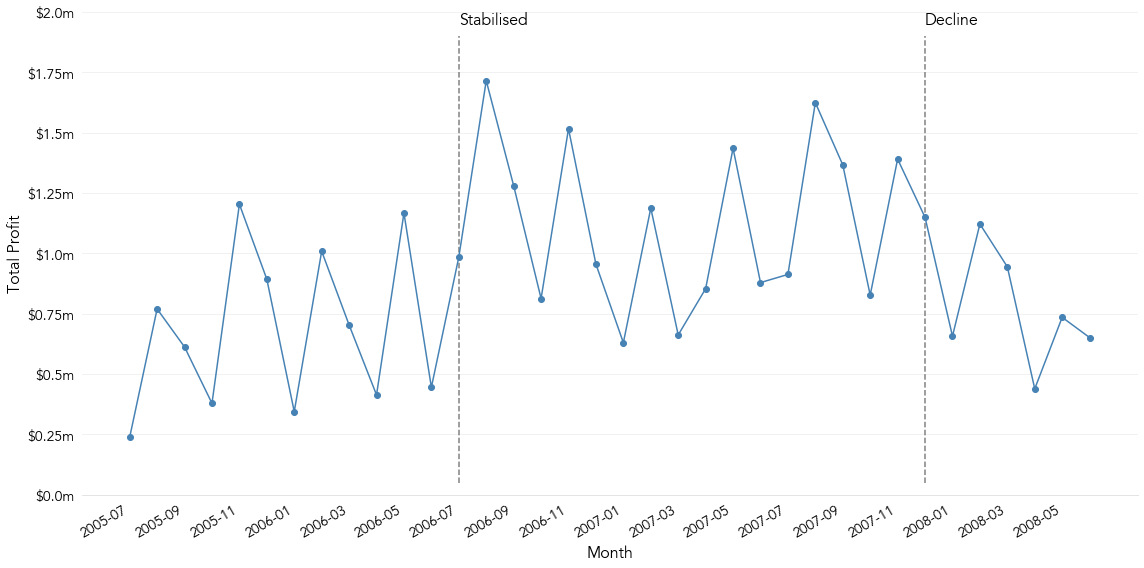

In [8]:
fig1 = plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig1.add_subplot(1, 1, 1)
ax.plot(range(len(monthly_profits)), monthly_profits['Profit'], color='steelblue', marker='o')

ax.set_xticks(range(0, len(monthly_profits), 2))
ax.set_xticklabels([monthly_profits['OrderMonth'].tolist()[i] for i in range(0, len(monthly_profits), 2)],
                   fontsize=14, rotation=30, ha='right')
ax.set_xlabel('Month', fontsize=16)

ax.set_ylim(0, 2000000)
ax.set_yticks(range(0, 2000001, 250000))
ax.set_yticklabels(['${}m'.format(str(i/1000000)) for i in range(0, 2000001, 250000)], fontsize=14)
ax.set_ylabel('Total Profit', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, right=False)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='#EEEEEE')

ax.vlines([monthly_profits['OrderMonth'].tolist().index('2006-07'),
          monthly_profits['OrderMonth'].tolist().index('2007-12')],
          50000, 1900000, linestyle='--', color='grey')

ax.text(monthly_profits['OrderMonth'].tolist().index('2006-07'), 1950000, 'Stabilised', fontsize=16)
ax.text(monthly_profits['OrderMonth'].tolist().index('2007-12'), 1950000, 'Decline', fontsize=16)

plt.tight_layout()
plt.show()

fig1.savefig('adventure_works_figs/profits.png')

Examine monthly total **volume** sold

In [9]:
monthly_volumes = df.groupby('OrderMonth')['OrderQty'].sum().reset_index()
monthly_volumes.columns = ['OrderMonth', 'total_qty']

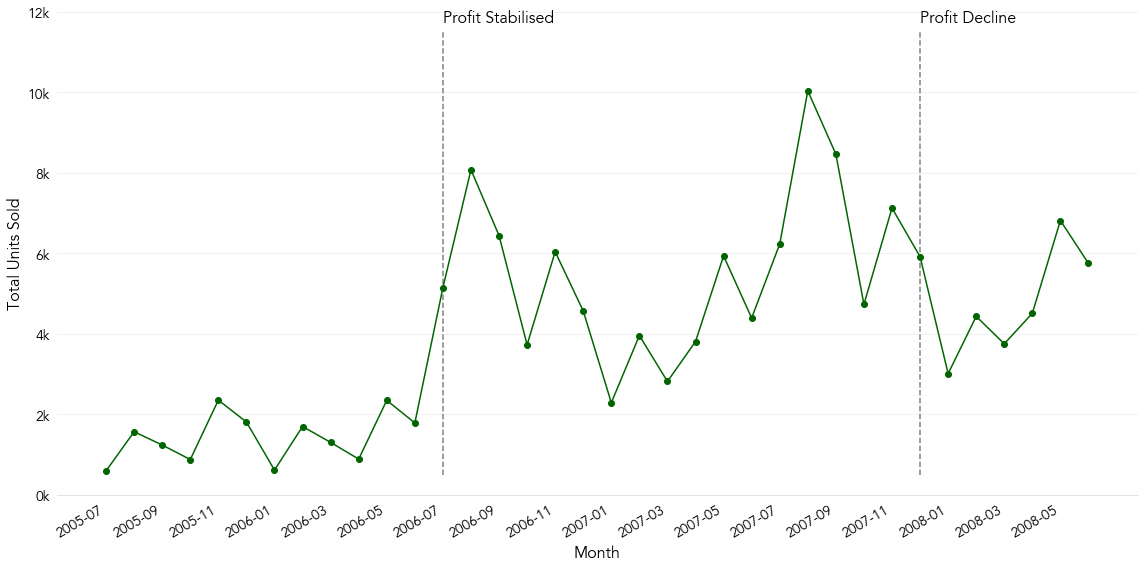

In [10]:
fig2 = plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig2.add_subplot(1, 1, 1)
ax.plot(range(len(monthly_volumes)), monthly_volumes['total_qty'], color='darkgreen', marker='o')

ax.set_xticks(range(0, len(monthly_profits), 2))
ax.set_xticklabels([monthly_volumes['OrderMonth'].tolist()[i] for i in range(0, len(monthly_volumes), 2)],
                   fontsize=14, rotation=30, ha='right')
ax.set_xlabel('Month', fontsize=16)

ax.set_ylim(0, 12000)
ax.set_yticks(range(0, 12001, 2000))
ax.set_yticklabels(['{}k'.format(str(int(i/1000))) for i in range(0, 12001, 2000)], fontsize=14)
ax.set_ylabel('Total Units Sold', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, right=False)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='#EEEEEE')

ax.vlines([monthly_volumes['OrderMonth'].tolist().index('2006-07'),
          monthly_volumes['OrderMonth'].tolist().index('2007-12')],
          500, 11500, linestyle='--', color='grey')

ax.text(monthly_volumes['OrderMonth'].tolist().index('2006-07'), 11750, 'Profit Stabilised', fontsize=16)
ax.text(monthly_volumes['OrderMonth'].tolist().index('2007-12'), 11750, 'Profit Decline', fontsize=16)

plt.tight_layout()
plt.show()

fig2.savefig('adventure_works_figs/volumes.png')

Examine monthly average unit **price** and **discount**

In [11]:
monthly_pricing = df.groupby('OrderMonth').agg({'UnitPrice': 'mean', 'UnitPriceDiscount': 'mean'}).reset_index()
monthly_pricing.columns = ['OrderMonth', 'avg_price', 'avg_discount']

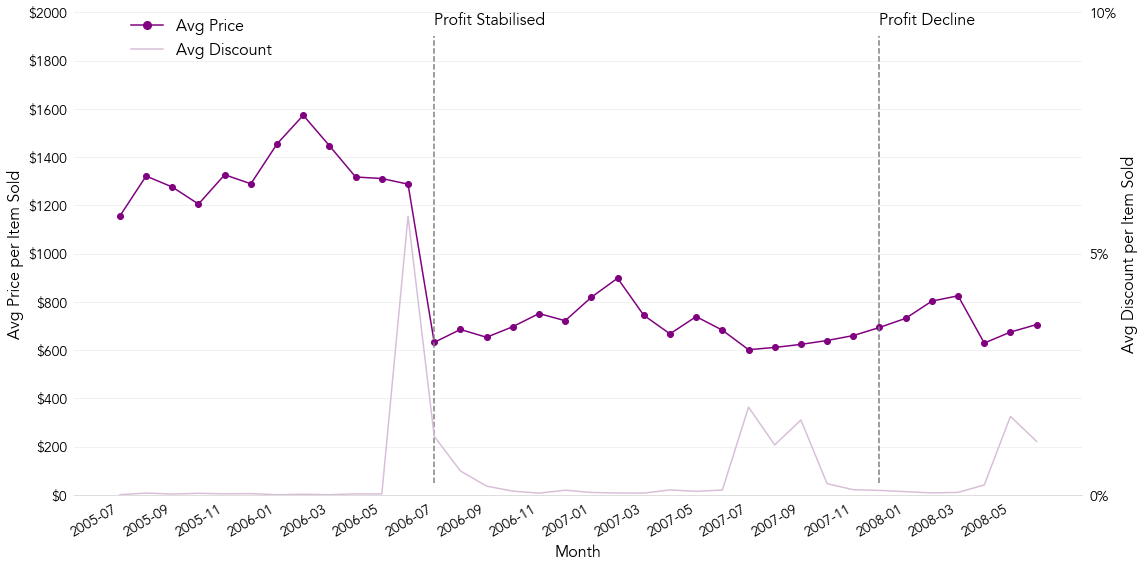

In [12]:
fig3 = plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig3.add_subplot(1, 1, 1)
ax.plot(range(len(monthly_pricing)), monthly_pricing['avg_price'], color='purple', marker='o')

ax.set_xticks(range(0, len(monthly_pricing), 2))
ax.set_xticklabels([monthly_pricing['OrderMonth'].tolist()[i] for i in range(0, len(monthly_pricing), 2)],
                   fontsize=14, rotation=30, ha='right')
ax.set_xlabel('Month', fontsize=16)

ax.set_ylim(0, 2000)
ax.set_yticks(range(0, 2001, 200))
ax.set_yticklabels(['$'+str(i) for i in range(0, 2001, 200)], fontsize=14)
ax.set_ylabel('Avg Price per Item Sold', fontsize=16)

ax.yaxis.grid(True, color='#EEEEEE')

ax1 = ax.twinx()
ax1.plot(range(len(monthly_pricing)), monthly_pricing['avg_discount'], color='thistle')

ax1.set_ylim(0, 0.1)
ax1.set_yticks([0, 0.05, 0.1])
ax1.set_yticklabels(['0%', '5%', '10%'], fontsize=14)
ax1.set_ylabel('Avg Discount per Item Sold', fontsize=16)

for ax in [ax, ax1]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False, right=False)
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)


ax1.vlines([monthly_pricing['OrderMonth'].tolist().index('2006-07'),
          monthly_pricing['OrderMonth'].tolist().index('2007-12')],
          0.0025, 0.095, linestyle='--', color='grey')

ax1.text(monthly_pricing['OrderMonth'].tolist().index('2006-07'), 0.0975, 'Profit Stabilised', fontsize=16)
ax1.text(monthly_pricing['OrderMonth'].tolist().index('2007-12'), 0.0975, 'Profit Decline', fontsize=16)

handle1 = Line2D([2], [0], color='purple', markerfacecolor='purple', marker='o', markersize=8)
handle2 = Line2D([2], [0], color='thistle')
ax1.legend(handles=[handle1, handle2], labels=['Avg Price', 'Avg Discount'],
                   fontsize=16, framealpha=0, loc=[0.05, 0.89])

plt.tight_layout()
plt.show()

fig3.savefig('adventure_works_figs/pricing.png')

Examine monthly average **unit cost** and **freight cost**

In [13]:
monthly_costs = df.groupby('OrderMonth').agg({'Unit_Cost': 'mean', 'Unit_Freight_Cost': 'mean'}).reset_index()
monthly_costs.columns = ['OrderMonth', 'avg_cost', 'avg_freight_cost']

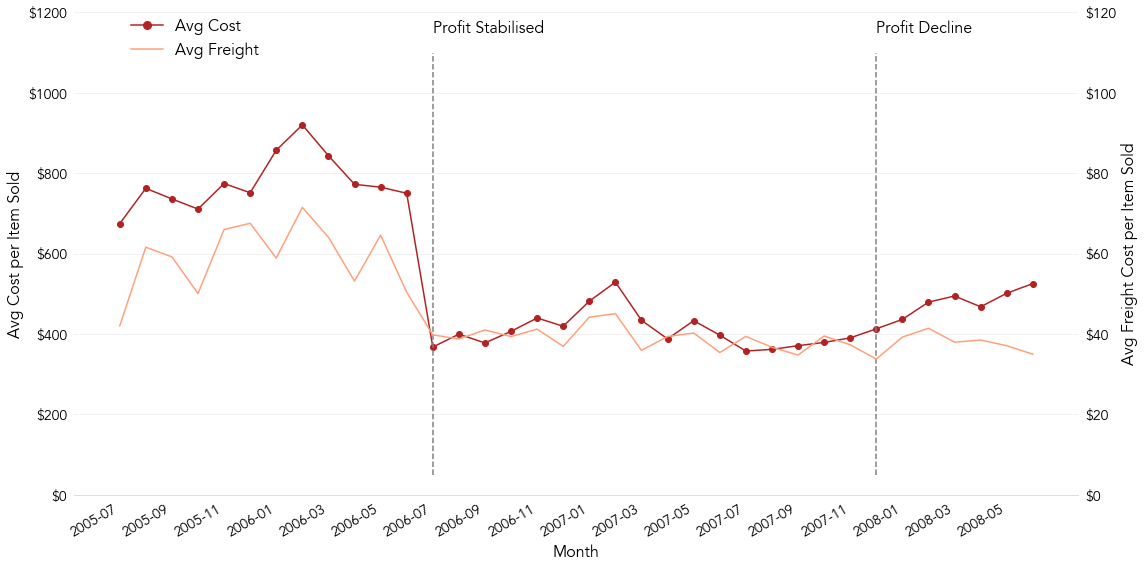

In [14]:
fig4 = plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig4.add_subplot(1, 1, 1)
ax.plot(range(len(monthly_costs)), monthly_costs['avg_cost'], color='firebrick', marker='o')

ax.set_xticks(range(0, len(monthly_costs), 2))
ax.set_xticklabels([monthly_costs['OrderMonth'].tolist()[i] for i in range(0, len(monthly_costs), 2)],
                   fontsize=14, rotation=30, ha='right')
ax.set_xlabel('Month', fontsize=16)

ax.set_ylim(0, 1200)
ax.set_yticks(range(0, 1201, 200))
ax.set_yticklabels(['$'+str(i) for i in range(0, 1201, 200)], fontsize=14)
ax.set_ylabel('Avg Cost per Item Sold', fontsize=16)

ax.yaxis.grid(True, color='#EEEEEE')

ax1 = ax.twinx()
ax1.plot(range(len(monthly_costs)), monthly_costs['avg_freight_cost'], color='lightsalmon')

ax1.set_ylim(0, 120)
ax1.set_yticks(range(0, 121, 20))
ax1.set_yticklabels(['$'+str(i) for i in range(0, 121, 20)], fontsize=14)
ax1.set_ylabel('Avg Freight Cost per Item Sold', fontsize=16)

for ax in [ax, ax1]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False, right=False)
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)


ax1.vlines([monthly_pricing['OrderMonth'].tolist().index('2006-07'),
          monthly_pricing['OrderMonth'].tolist().index('2007-12')],
          5, 110, linestyle='--', color='grey')

ax1.text(monthly_costs['OrderMonth'].tolist().index('2006-07'), 115, 'Profit Stabilised', fontsize=16)
ax1.text(monthly_costs['OrderMonth'].tolist().index('2007-12'), 115, 'Profit Decline', fontsize=16)

handle1 = Line2D([2], [0], color='firebrick', markerfacecolor='firebrick', marker='o', markersize=8)
handle2 = Line2D([2], [0], color='lightsalmon')
ax1.legend(handles=[handle1, handle2], labels=['Avg Cost', 'Avg Freight'],
                   fontsize=16, framealpha=0, loc=[0.05, 0.89])

plt.tight_layout()
plt.show()

fig4.savefig('adventure_works_figs/costs.png')

### Step IV: Deep-dive into costs

Evaluate change in average cost per product category over time

In [15]:
product_costs = df.groupby(['OrderMonth', 'Product_Category'])['Unit_Cost'].mean().reset_index()
product_costs = product_costs.pivot_table(columns='Product_Category',
                                          index='OrderMonth', values='Unit_Cost').reset_index()

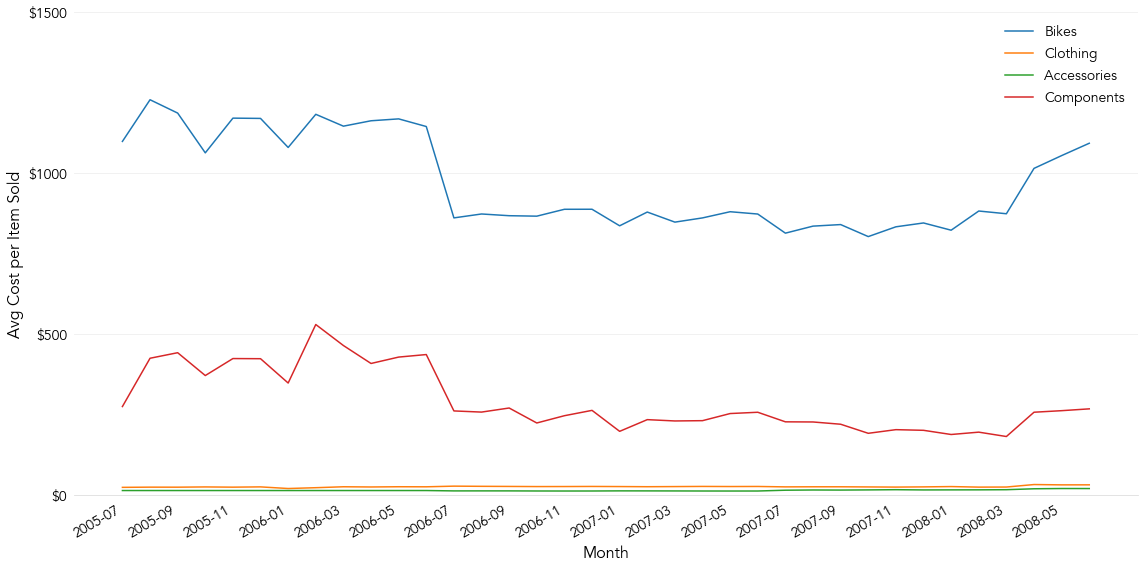

In [16]:
fig5 = plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig5.add_subplot(1, 1, 1)
for cat in df['Product_Category'].unique():
    ax.plot(range(len(product_costs)), product_costs[cat])
    
ax.set_xticks(range(0, len(product_costs), 2))
ax.set_xticklabels([product_costs['OrderMonth'].tolist()[i] for i in range(0, len(product_costs), 2)],
                   fontsize=14, rotation=30, ha='right')
ax.set_xlabel('Month', fontsize=16)

ax.set_ylim(0, 1500)
ax.set_yticks(range(0, 1501, 500))
ax.set_yticklabels(['$'+str(i) for i in range(0, 1501, 500)], fontsize=14)
ax.set_ylabel('Avg Cost per Item Sold', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, right=False)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='#EEEEEE')

ax.legend(labels=df['Product_Category'].unique(), fontsize=14, framealpha=0)

plt.tight_layout()
plt.show()

fig5.savefig('adventure_works_figs/product_costs.png')

### Step V: Deep-dive into product range

Evaluate relationship between number of unique products offered and profits generated

In [17]:
products_per_month = df.groupby('OrderMonth')['LineItem_Id'].nunique().reset_index()
products_per_month.rename(columns={'LineItem_Id': 'count_products_offered'}, inplace=True)

In [18]:
r = stats.pearsonr(monthly_profits['Profit'], products_per_month['count_products_offered'])[0]

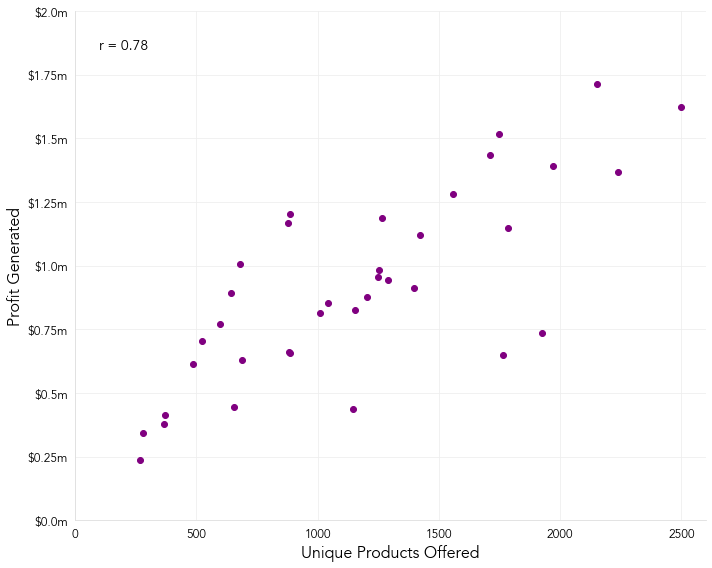

In [19]:
fig6 = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig6.add_subplot(1, 1, 1)
ax.scatter(products_per_month['count_products_offered'], monthly_profits['Profit'], color='purple')

ax.set_xlim(0, 2600)
ax.set_xticks(range(0, 2501, 500))
ax.set_xticklabels(range(0, 2501, 500), fontsize=12)
ax.set_xlabel('Unique Products Offered', fontsize=16)

ax.set_ylim(0, 2000000)
ax.set_yticks(range(0, 2000001, 250000))
ax.set_yticklabels(['${}m'.format(str(i/1000000)) for i in range(0, 2000001, 250000)], fontsize=12)
ax.set_ylabel('Profit Generated', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, right=False)
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#EEEEEE')
ax.yaxis.grid(True, color='#EEEEEE')

ax.text(100, 1850000, 'r = {}'.format(round(r, 2)), fontsize=14)

plt.tight_layout()
plt.show()

fig6.savefig('adventure_works_figs/product_range.png')

Compare profitability across product categories

In [20]:
product_profits = df[df['OrderMonth']>='2007-07'].groupby('Product_Category')['Profit'].sum().reset_index()

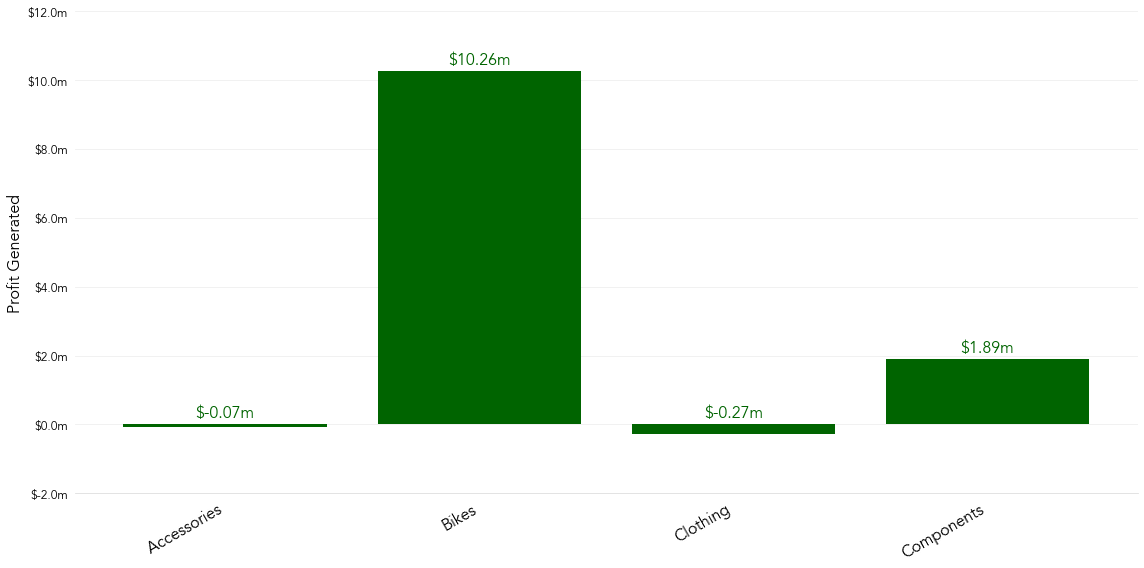

In [21]:
fig7 = plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig7.add_subplot(1, 1, 1)
bars = ax.bar(range(len(product_profits)), product_profits['Profit'], color='darkgreen')

ax.set_xticks(range(len(product_profits)))
ax.set_xticklabels(product_profits['Product_Category'], fontsize=16, rotation=30, ha='right')

ax.set_ylim(-2000000, 12000000)
ax.set_yticks(range(-2000000, 12000001, 2000000))
ax.set_yticklabels(['${}m'.format(str(i/1000000)) for i in range(-2000000, 12000001, 2000000)], fontsize=12)
ax.set_ylabel('Profit Generated', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, right=False)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='#EEEEEE')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, max(bar.get_height(), 0)+200000,
            '${}m'.format(round(bar.get_height()/1000000, 2)), ha='center',
            fontsize=16, color=bar.get_facecolor())

plt.tight_layout()
plt.show()

fig7.savefig('adventure_works_figs/product_profits.png')

### Step VI: Deep-dive into profitability by province

Profitability during stable vs decline periods by province

In [22]:
stable_period = df[(df['OrderMonth']>='2006-07') &
            (df['OrderMonth']<='2007-12')].groupby(['Sales_Province', 'OrderMonth'])['Profit'].sum().reset_index()
stable_period = stable_period.groupby('Sales_Province')['Profit'].mean().reset_index()
stable_period.rename(columns={'Profit': 'stable_period'}, inplace=True)

In [23]:
decline_period = df[df['OrderMonth']>='2008-01'].groupby(['Sales_Province',
                                            'OrderMonth'])['Profit'].sum().reset_index()
decline_period = decline_period.groupby('Sales_Province')['Profit'].mean().reset_index()
decline_period.rename(columns={'Profit': 'decline_period'}, inplace=True)

In [24]:
province_profits = stable_period.merge(decline_period, on='Sales_Province', how='left')

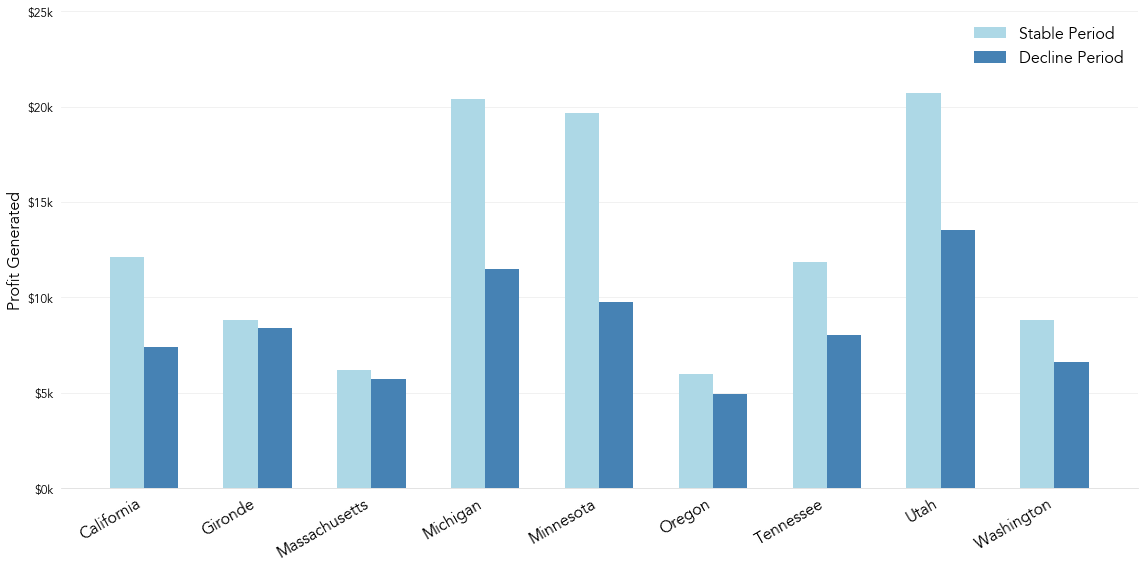

In [26]:
fig8 = plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Avenir'

ax = fig8.add_subplot(1, 1, 1)

width = 0.3
x1 = [i - width/2 for i in range(len(province_profits))]
x2 = [i + width/2 for i in range(len(province_profits))]

ax.bar(x1, province_profits['stable_period'], width=width, color='lightblue')
ax.bar(x2, province_profits['decline_period'], width=width, color='steelblue')

ax.set_xticks(range(len(province_profits)))
ax.set_xticklabels(province_profits['Sales_Province'], fontsize=16, rotation=30, ha='right')

ax.set_ylim(0, 250000)
ax.set_yticks(range(0, 250001, 50000))
ax.set_yticklabels(['${}k'.format(str(int(i/10000))) for i in range(0, 250001, 50000)], fontsize=12)
ax.set_ylabel('Profit Generated', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False, right=False)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='#EEEEEE')

ax.legend(labels=['Stable Period', 'Decline Period'], fontsize=16, framealpha=0)

plt.tight_layout()
plt.show()

fig8.savefig('adventure_works_figs/province_profits.png')